In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [2]:
data = tf.keras.utils.image_dataset_from_directory('R:\\Traffic\\Data\\pedestrian_main//')

Found 921 files belonging to 2 classes.


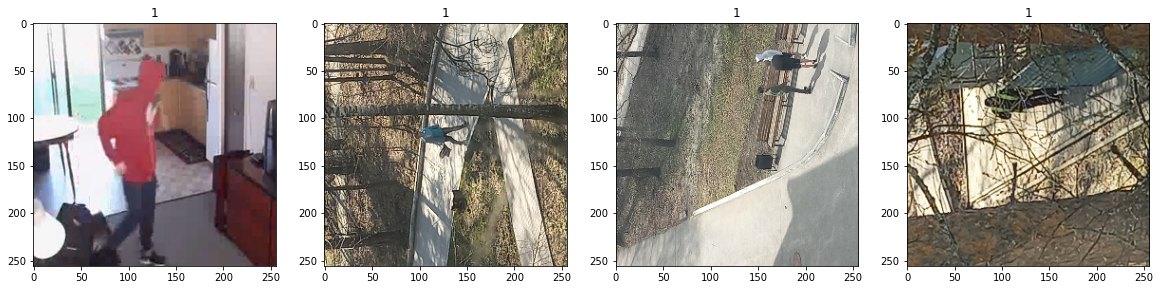

In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.835432  , 0.8522606 , 0.8660233 ],
          [0.90302867, 0.91881126, 0.9344012 ],
          [0.88555455, 0.9025758 , 0.9231334 ],
          ...,
          [0.44637176, 0.45245326, 0.46856618],
          [0.41789216, 0.42397365, 0.43965992],
          [0.32073268, 0.32857582, 0.3442621 ]],
 
         [[0.8602131 , 0.8776828 , 0.8929643 ],
          [0.92858255, 0.9443433 , 0.9599551 ],
          [0.9366796 , 0.9523659 , 0.97486216],
          ...,
          [0.4505668 , 0.45746017, 0.4740962 ],
          [0.41789216, 0.4257353 , 0.44142157],
          [0.321875  , 0.32881877, 0.34540442]],
 
         [[0.73044205, 0.7467541 , 0.7686927 ],
          [0.7422964 , 0.7579827 , 0.77753776],
          [0.7541968 , 0.7698831 , 0.7934125 ],
          ...,
          [0.4482423 , 0.45608544, 0.47250307],
          [0.41789216, 0.4257353 , 0.44142157],
          [0.3182927 , 0.32613584, 0.34182212]],
 
         ...,
 
         [[0.21506049, 0.21506049, 0.21506049],
          [0.21085

In [5]:
len(data)

29

In [10]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [11]:
print(train_size, val_size, test_size)

21 5 3


In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
#print(len(train), len(val), len(test))

In [14]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [17]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
21/21 [==============================] - 211s 2s/step - loss: 0.8339 - accuracy: 0.5357 - val_loss: 0.6445 - val_accuracy: 0.6313
Epoch 2/25
21/21 [==============================] - 16s 717ms/step - loss: 0.6489 - accuracy: 0.6399 - val_loss: 0.6172 - val_accuracy: 0.6625
Epoch 3/25
21/21 [==============================] - 15s 704ms/step - loss: 0.6305 - accuracy: 0.6652 - val_loss: 0.5807 - val_accuracy: 0.7125
Epoch 4/25
21/21 [==============================] - 16s 715ms/step - loss: 0.5885 - accuracy: 0.6741 - val_loss: 0.5978 - val_accuracy: 0.7000
Epoch 5/25
21/21 [==============================] - 16s 714ms/step - loss: 0.5307 - accuracy: 0.7381 - val_loss: 0.6061 - val_accuracy: 0.6562
Epoch 6/25
21/21 [==============================] - 17s 758ms/step - loss: 0.4989 - accuracy: 0.7753 - val_loss: 0.4836 - val_accuracy: 0.7812
Epoch 7/25
21/21 [==============================] - 17s 773ms/step - loss: 0.4218 - accuracy: 0.7932 - val_loss: 0.5007 - val_accuracy: 0.7500
E

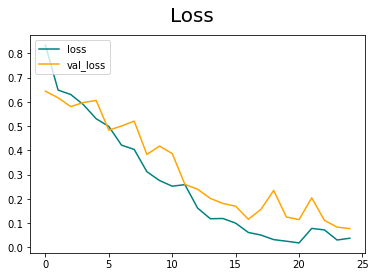

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

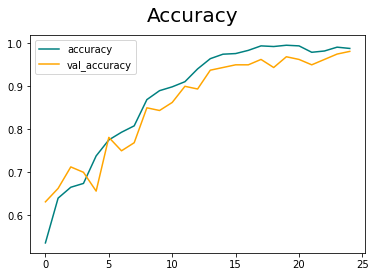

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [22]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 0.9807692 0.9895833


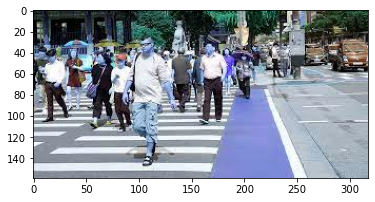

In [34]:
img = cv2.imread('R:\\Traffic\\Pedestrian\\test\\ped1.jpg')
plt.imshow(img)
plt.show()

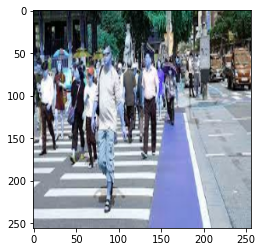

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [37]:
yhat

array([[0.48333028]], dtype=float32)

In [38]:
if yhat > 0.5: 
    print(f'Pedestrian')
else:
    print(f'No Pedestrain')

No Pedestrain


In [28]:
model.save(os.path.join('models','pedestrian_main.h5'))